In [1]:
# Dimentionality Reduction by applying PCA

In [2]:
# imports
import matplotlib.pyplot as plt
import warnings
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from joblib import load
#
from moduleModelTraining import TrainingMethods
from moduleMetrics import MetricsMethods
warnings.filterwarnings(action='ignore')

In [3]:
# class instances
train = TrainingMethods()
evaluate = MetricsMethods()

In [4]:
test_size = 0.25
cross_val_num=3
smote_x, smote_y = None, None

pca_x: (188, 2)
explained variance ratio (first two components): [0.43099587 0.18059095]


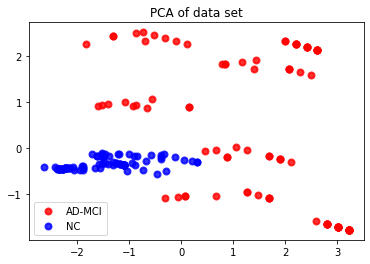

In [5]:
with open('fragments/smote_x.joblib', 'rb') as f: smote_x = load(f)
with open('fragments/smote_y.joblib', 'rb') as f: smote_y = load(f)

# Instantiate PCA transformer
pca = PCA(n_components=2)
pca_x = pca.fit(smote_x).transform(smote_x)
print('pca_x:',pca_x.shape)

# Just to remember that I do not make any transformations on target class
pca_y = smote_y

# Save data set with the extracted features (components)
pkl.dump(pca_x, open('fragments/pca_x.joblib', 'wb'))
pkl.dump(pca_y, open('fragments/pca_y.joblib', 'wb'))

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['red', 'blue']
lw = 2
for color, i, target_name in zip(colors, [1, 2], ['AD-MCI','NC']):
    plt.scatter(pca_x[smote_y == i, 0], pca_x[smote_y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of data set')
plt.show();

In [6]:
# split of pca_x and smote_y to train test data set
pca_train_x, pca_test_x, pca_train_y, pca_test_y = train_test_split(pca_x, pca_y, random_state=7, test_size=test_size, 
                                                                    stratify=pca_y)

Trained model:  lr  accuracy:  87.36
Trained model:  dt  accuracy:  95.83
Trained model:  rf  accuracy:  95.83
Trained model:  sv  accuracy:  93.75
Trained model:  gn  accuracy:  100.0
Trained model:  gn_o  accuracy:  89.58
Trained model:  mp  accuracy:  91.67
Trained model:  kn  accuracy:  91.67
Trained model:  ce  accuracy:  95.83
Total training time: 1.53 seconds
Count of label NC (id 2 in Database, 1 in CM) in y_test: 24
Count of label AD-MCI (id 1 in Database, 0 in CM) in y_test: 23 



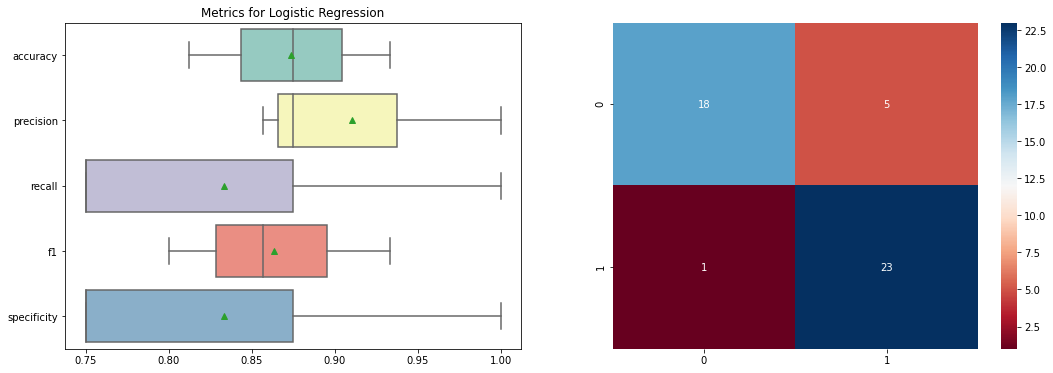

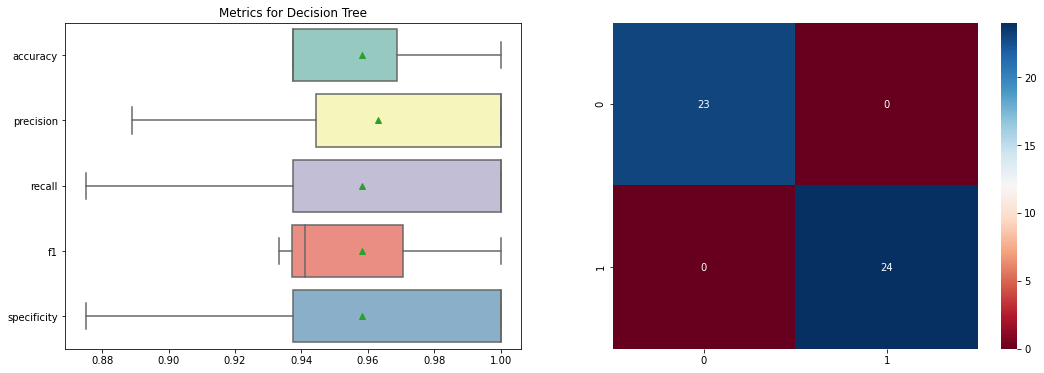

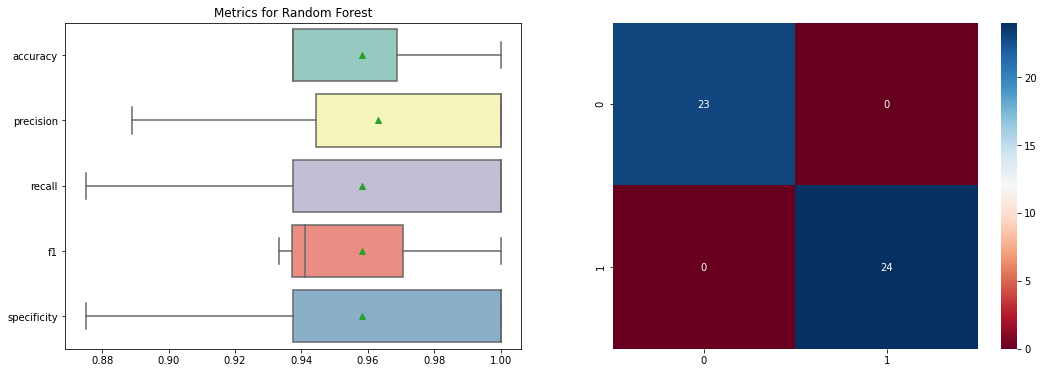

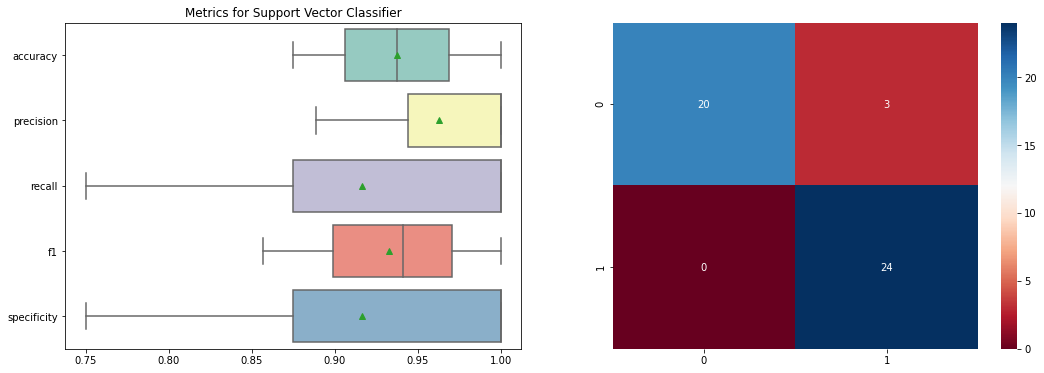

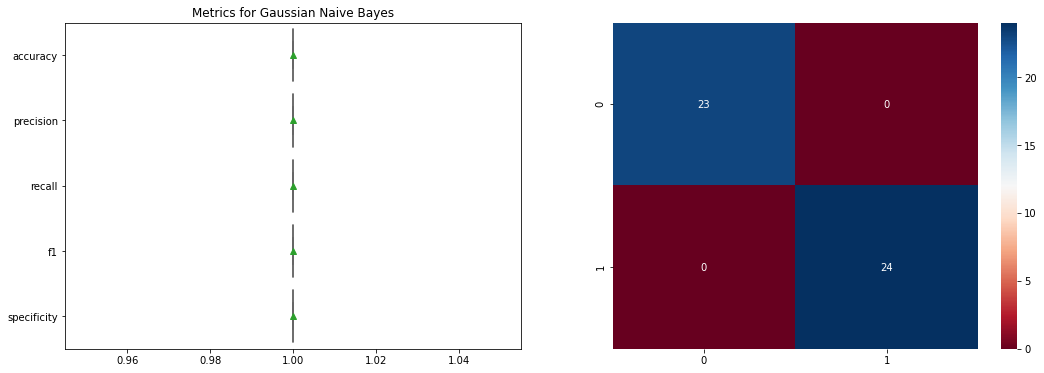

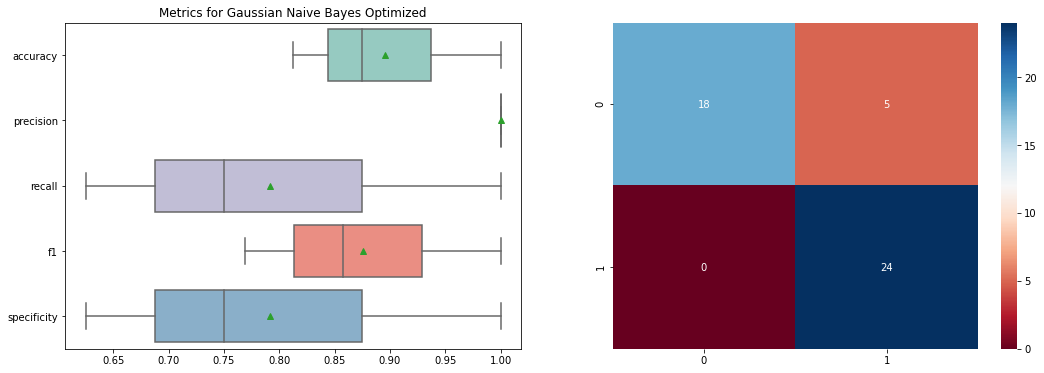

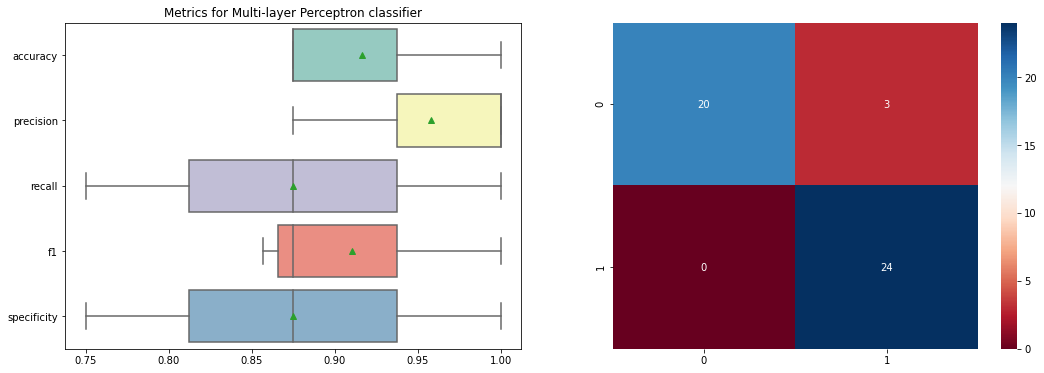

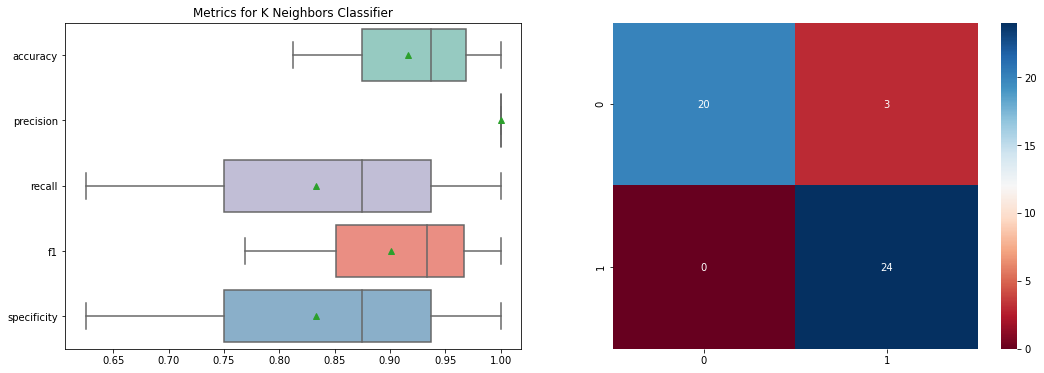

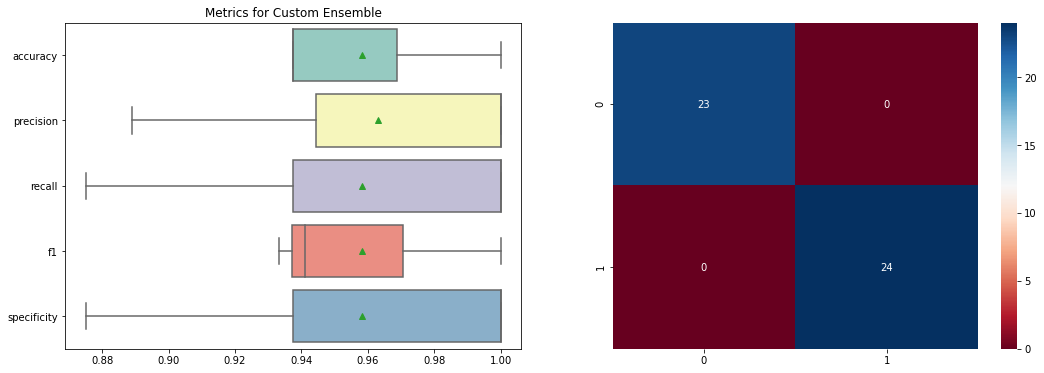

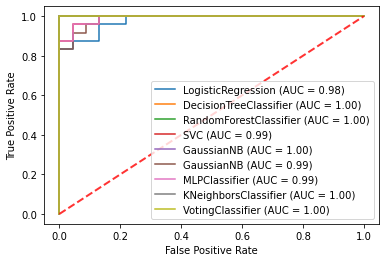

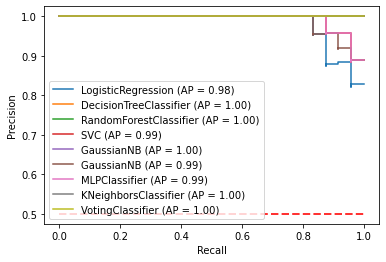

In [7]:
# train and evaluate models using the 2 components from PCA
trained_models_using_pca_comp = train.train_models(pca_train_x, pca_train_y, pca_test_x, pca_test_y)
evaluate.generate_metrics(trained_models_using_pca_comp, pca_test_x, pca_test_y, 
                          ['accuracy', 'precision', 'recall', 'f1', 'specificity'], cv_num=cross_val_num, show_raw_data=False)

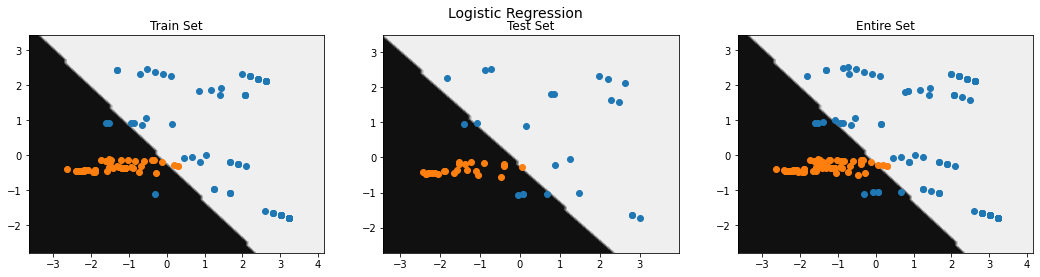

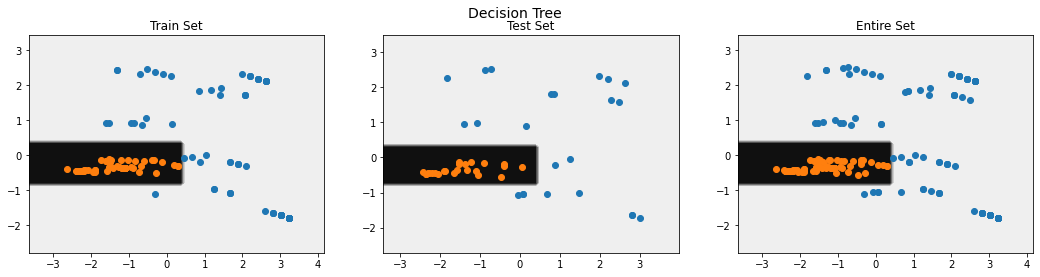

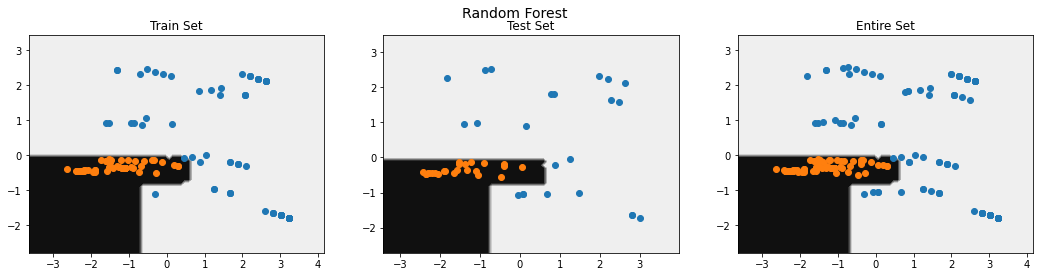

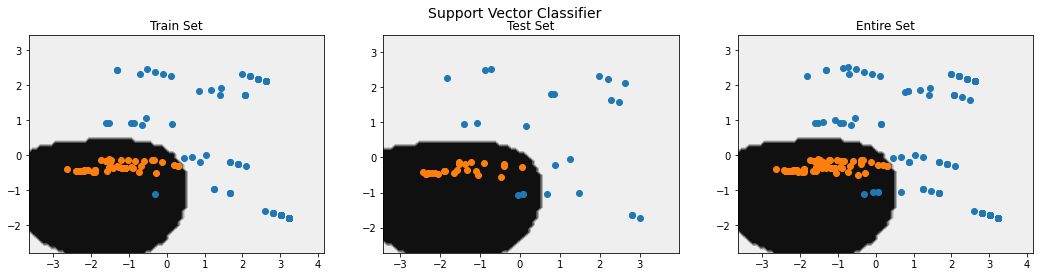

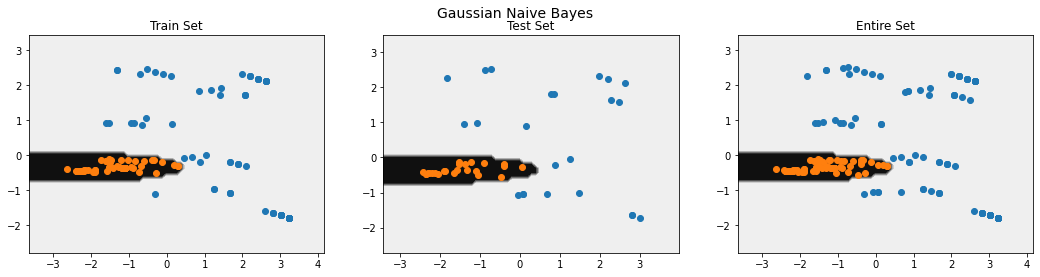

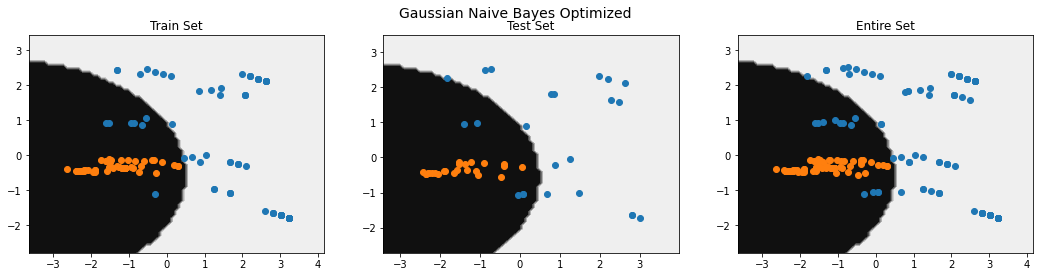

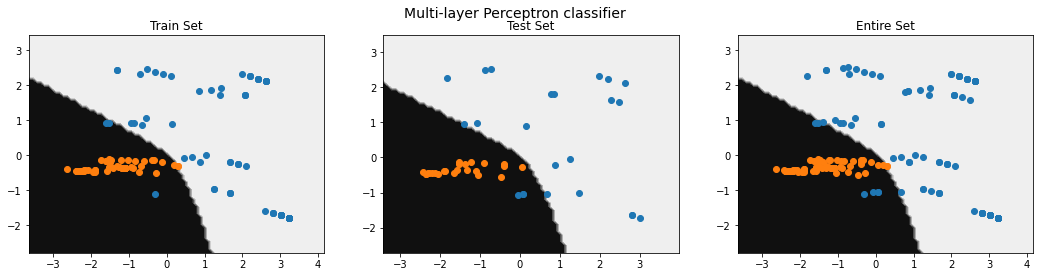

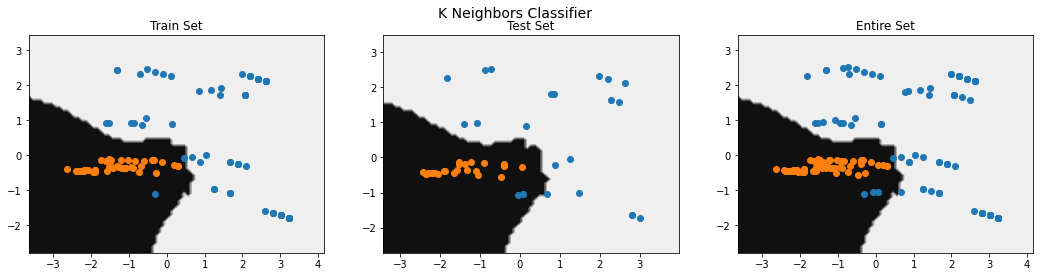

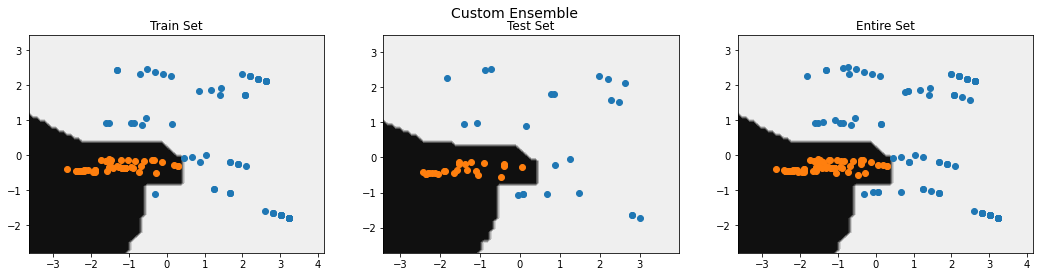

In [8]:
# Print decision surface for each Baseline model
data_set_tuples = [(pca_train_x, pca_train_y), (pca_test_x, pca_test_y), (pca_x, smote_y)]
show_probabilities = False
evaluate.print_decision_surface(trained_models_using_pca_comp, data_set_tuples, show_probabilities)